## Metoda Monte Carlo

#### Panna nebo orel?

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

Pravděpodobnost padnutí orla:  0.575


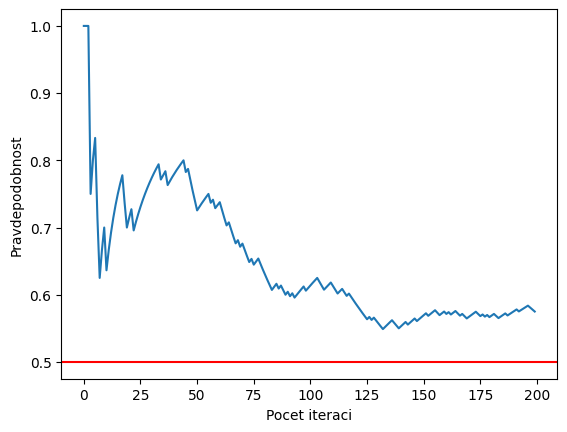

In [4]:
def hod_minci():                                    # jednotlivý hod mincí
    return random.randint(0,1)

def monte_carlo(pocet_iteraci):
    okamzite_prsti = []
    soucet_hodnot = 0
    for ipokus in range(pocet_iteraci):
        vysledek_hodu = hod_minci()
        soucet_hodnot += vysledek_hodu              # pro prům. prst v průběhu simulace
        okamzite_prsti.append(soucet_hodnot/(ipokus+1))

    plt.axhline(y=0.5, color="r", linestyle="-")    # polovina (očekávaná prst)
    plt.xlabel("Pocet iteraci")
    plt.ylabel("Pravdepodobnost")
    plt.plot(okamzite_prsti)
    return soucet_hodnot/pocet_iteraci

prst_orel = monte_carlo(200)
print("Pravděpodobnost padnutí orla: ", prst_orel)


#### Buffonova jehla

In [3]:
import math, random
def buffon(n):                                      # zadani poctu pokusu
    zasah = 0;
    for l in range(0, (n-1)):
        xs = random.random();                       # pozice stredu mezi dvema liniemi
        uhel = (random.random() * math.pi) - math.pi / 2;   # uhel jehly
        xpravy = xs + math.cos(uhel)/2;             # pravy konec jehly
        xlevy = xs - math.cos(uhel)/2;              # levy konec jehly
        if xpravy >= 1 or xlevy <= 0:
            zasah = zasah + 1;                      # pocitadlo zasahu
    return zasah

n=10000000
zasah = buffon(n)
vedle = n - zasah
Pi = n / zasah * 2                                  # odhad pi
print(Pi)

3.1421892480882527


#### Cvičení 1: Monty Hall problém

Představte si, že jste v televizní soutěži. Moderátor vám nabídne 3 dveře, které můžete otevřít. Jedny dveře ukrývají nový luxusní automobil a dvoje dvěře ukrývají kozu. Moderátor vás vyzve k výběru, vy si vyberete a otevřete (např.: dveře 1), ale nesmíte je otevřít. Moderátor následně otevře jedni ze dvou zbývajících dveří (např.: dveře 3) a odhalí za nimi kozu. Následně se moderátor zeptá, zda chcete změnit svůj výběr (dveře 1) na zbývající neotevřené dveře (dveře 2). Pokud chcete vyhrát automobil, bude větší šance ponechat si své dveře (dveře 1) nebo změnit volbu na zbývající dveře (dveře 2)?

Vaším úkolem je zjistit, zda je lepší změnit volbu dvěří. Důkaz proveďte pomocí metody Monte Carlo. Postup:
1. vytvořte seznam objektů za dveřmi, zamíchejte ho a proveďte náhodný výběr hráčem
2. moderátor odebere jednu kozu ze seznamu objektů za dvěřmi
3. hráč náhodně zvolí, zda změní volbu za zbývající objekt za dveřmi nebo si ponechá volbu
4. proveďte po zvolený počet iterací
5. nasčítejte, kolikrát by vyhrál změnou a kolikrát by vyhrál ponecháním
6. vhodně vizualizujte výsledky (například graf) nebo souhrnné číslo

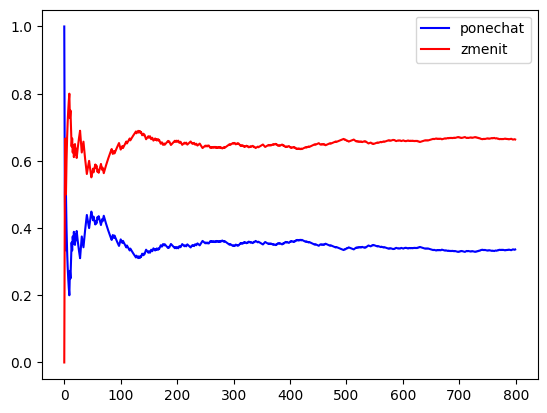

Sance na vyhru zmenou vyberu:  0.66375
Sance na vyhru ponechanim vyberu:  0.33625


In [16]:
from random import shuffle, choice

def monte_carlo_monty_hall(pocet_iteraci):
    pravdepodobnost_vyhry_ponechat = []
    pravdepodobnost_vyhry_zmenit = []
    pocet_vyher_zmena_dveri = 0
    pocet_vyher_ponechani_dveri = 0

    for iterace in range(pocet_iteraci):
        dvere = ["koza", "koza", "automobil"]
        shuffle(dvere)
        puvodni_volba_hrac = dvere.pop(dvere.index(choice(dvere)))
        # ve skutecnosti diky rozmichani shufflem neni nutne vybirat pomoci choice, stacil by pop
        # ale timto zpusobem modelujeme spravne cely psychologicky proces v hlave hrace
        
        volba_moderator = dvere.pop(dvere.index("koza"))
        
        #lze to napsat do jednoho příkazu celé, ale pak to již nebude tak explicitní :)
        zmena_rozhodnuti = choice(["ano", "ne"])
        if zmena_rozhodnuti == "ano":                # změna
            if puvodni_volba_hrac == "koza":            # původně měl kozu
                pocet_vyher_zmena_dveri += 1            # vyhraje auto
            elif puvodni_volba_hrac == "automobil":
                pocet_vyher_ponechani_dveri += 1        # dostane kozu
        elif zmena_rozhodnuti == "ne":              # beze změny
            if puvodni_volba_hrac == "automobil":       # původně měl mít auto
                pocet_vyher_ponechani_dveri += 1        # dostane auto
            elif puvodni_volba_hrac == "koza":
                pocet_vyher_zmena_dveri += 1            # dostane kozu
        
        pravdepodobnost_vyhry_zmenit.append(pocet_vyher_zmena_dveri/(iterace+1))
        pravdepodobnost_vyhry_ponechat.append(pocet_vyher_ponechani_dveri/(iterace+1))
    
    plt.plot(pravdepodobnost_vyhry_ponechat, "b", label="ponechat")
    plt.plot(pravdepodobnost_vyhry_zmenit, "r", label="zmenit")
    plt.legend()
    plt.show()
    print("Sance na vyhru zmenou vyberu: ", pravdepodobnost_vyhry_zmenit[-1])
    print("Sance na vyhru ponechanim vyberu: ", pravdepodobnost_vyhry_ponechat[-1])

monte_carlo_monty_hall(800)


### 8.2 Integrace metodou Monte Carlo

#### Výpočet hodnoty čísla PI

Pi =  3.1444


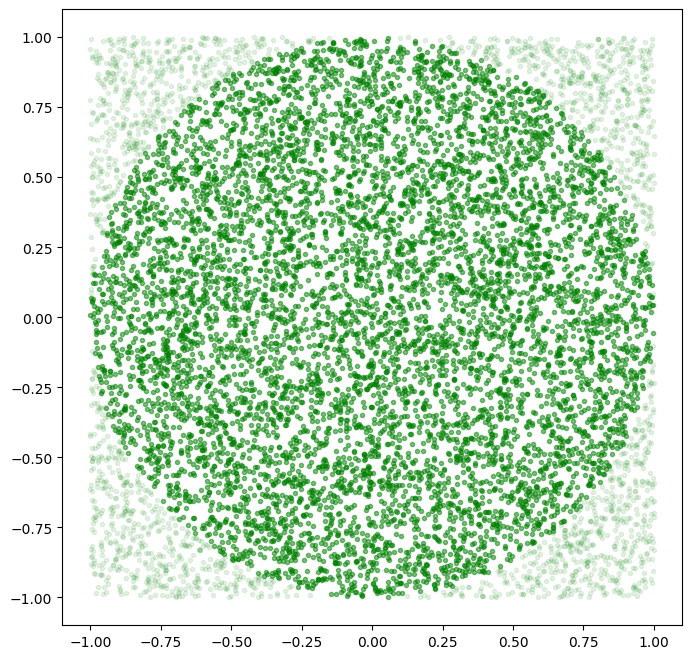

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats=["png"]

def aproximace_pi_monte_carlo(pocet_pokusu):
    zasahy = []     # zasaženo; seznam dvojic souřadnic x a y
    minuti = []     # minuto; totéž

    # generování vektorů s nahodnými souřadnicemi
    nahodne_x = np.random.uniform(-1, 1, pocet_pokusu)
    nahodne_y = np.random.uniform(-1, 1, pocet_pokusu)

    # pokud jsme se trefili do kružnice (detekce Pythagorovou větou), přičteme počet zásahů
    zasahy = list(filter(lambda x: x[0]**2 + x[1]**2 <= 1, zip(nahodne_x, nahodne_y)))
    minuti = list(filter(lambda x: x[0]**2 + x[1]**2 > 1, zip(nahodne_x, nahodne_y)))
 
    plt.figure(figsize=(8,8))
    # vykreslíme seznamy dvojic souřadnic x a y
    plt.scatter([x[0] for x in zasahy], [x[1] for x in zasahy], marker=".", color="green", alpha=0.5);
    plt.scatter([x[0] for x in minuti], [x[1] for x in minuti], marker=".", color="green", alpha=0.1);

    return 4 * len(zasahy)/float(pocet_pokusu)

print("Pi = ", aproximace_pi_monte_carlo(10000))

**Rychlost konvergence**

Chyba Monte Carlo metody by měla klesat proporčně k převrácené hodnotě odmocniny z počtu kroků.
$$\epsilon\space\text{\textasciitilde}\space\frac{1}{\sqrt{n_0}}$$

array([0.        , 2.        , 2.66666667, ..., 3.15063013, 3.15071507,
       3.1504    ])

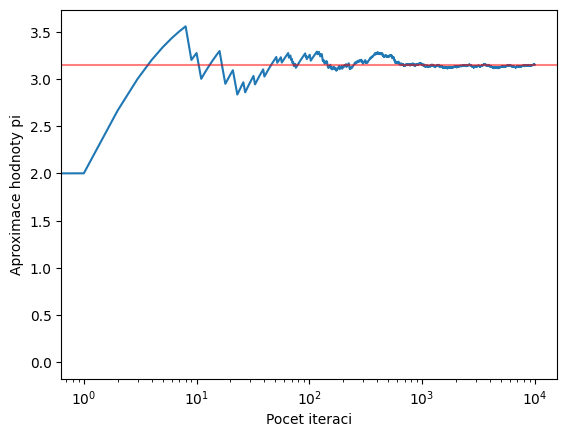

In [12]:
def aproximace_pi_MC(pocet_pokusu):
    zasahy = 0
    aproximace = np.empty(pocet_pokusu)         # nulový vektor dimenze 10000
    
    for i in range(pocet_pokusu):
        nahodne_x = np.random.uniform(-1, 1)    # hodnoty ve čtverci 2 x 2
        nahodne_y = np.random.uniform(-1, 1)
        zasahy += 1 if nahodne_x**2 + nahodne_y**2 <= 1 else 0
        aproximace[i] = 4 * zasahy/(i+1)

    plt.semilogx(aproximace)                    # závislost na počtu hodů
    plt.xlabel("Pocet iteraci")
    plt.ylabel("Aproximace hodnoty pi")
    plt.axhline(np.pi, color="r", alpha=0.5);   # pi přesně

    return aproximace

aproximace = aproximace_pi_MC(10000)
aproximace


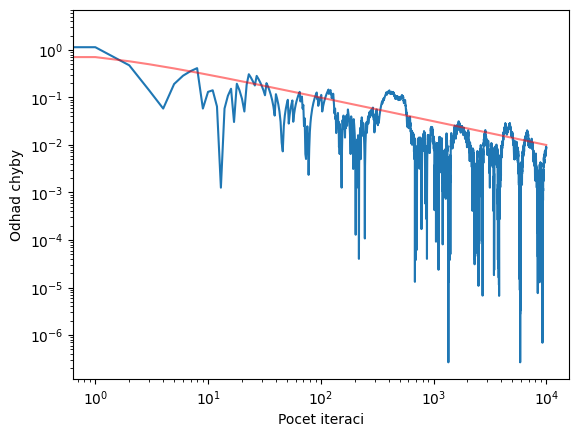

In [13]:
n = len(aproximace)                                             # počet aproximací
plt.loglog(np.arange(n), np.abs(aproximace-np.pi))              # odchylky od pi
plt.loglog(1/np.sqrt(np.arange(n)+1), color="r", alpha=0.5)     # odhad chyby 1/sqrt(n)
plt.xlabel("Pocet iteraci")
plt.ylabel("Odhad chyby");

#### Cvičení 2: Objem N-dimenzionální koule

Program z předchozího cvičení lze rychlou úpravou převést na výpočet N-dimenzionální krychle. Napište funkci, do které zadáte počet poloměr koule, počet dimenzí a počet iterací a program vrátí objem takové koule. Porovnejte výslednou aproximaci s teoretickým výsledkem.

In [14]:
def objem_nkoule(r, n_dim, n_iter):
    zasahy = 0
    nahodny_bod = [np.random.uniform(0, 2*r, n_dim) for i in range(n_iter)]
    zasahy = np.sum(list(filter(lambda x: np.sum([xi**2 for xi in x]) <= r, nahodny_bod)))
    objem_nkrychle = (2*r)*n_dim
    return objem_nkrychle*zasahy/n_iter

print(objem_nkoule(1, 1, 100000))
print(objem_nkoule(1, 2, 100000))
print(objem_nkoule(1, 3, 100000))
print(objem_nkoule(1, 4, 100000))
print(objem_nkoule(1, 5, 100000))

0.49981370874680403
0.6591478074354175
0.4333037176152749
0.2082257196293879
0.08058314389155258


#### Výpočet určitého integrálu

Jelikož Metodou Monte Carlo lze spočítat obsah nebo objem nějaké oblasti, lze s ní spočítat i určitý integrál. Opakování předchozí metody tedy vede k myšlence:
1. vygeneruj náhodné souřadnice x a fx
2. zjisti, zda spadají do oblasti, kterou funkce vytyčuje svou funkční hodnotou nad/pod osou x
3. započti nebo nezapočti zásah
4. spočítej integrál jako obsah oblasti pomocí procenta zásahů a obsahu omezující oblasti

Omezující oblast spočítáme jako obdélník, který je šiřoký jako definiční obor a vysoký jako obor hodnot. Zde se počítá s tím, že celý definiční obor je spojitý a stejně tak obor hodnot. Tento přístup (tzv. rejection sampling metoda) bude však značně nepřesný a také počítá integrál v absolutní hodnotě.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

5.136


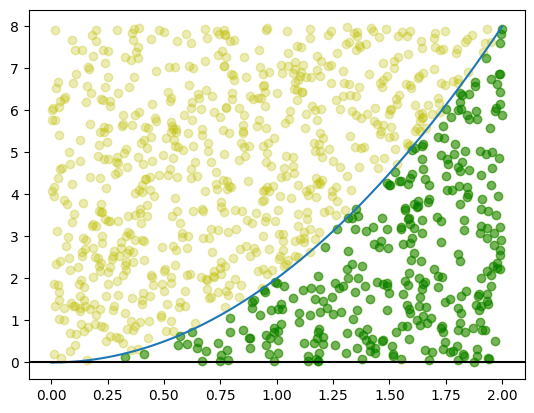

In [7]:
def zobraz(a, b, f, xs, fxs):
    x = np.linspace(a, b, 100)
    plt.plot(x, f(x))
    plt.axhline(y=0, color='k')

    condition = fxs < f(xs)
    xf = xs[condition]
    yf = fxs[condition]
    plt.scatter(xs, fxs, color='y', alpha=0.3)
    plt.scatter(xf, yf, color='g', alpha=0.5)

def integral(a, b, f, pocet_vzorku):
    max_f = max(f(np.linspace(a, b, 100000)))               # horní závora
    xs = np.random.uniform(a, b, pocet_vzorku)              # náhodné hodnoty x (mezi a a b)
    fxs = np.random.uniform(0, max_f, pocet_vzorku)         # náhodné funkční hodnoty (pro porovnání)
    hits = sum([1 for x, fx in zip(xs, fxs) if fx <= f(x)]) # spočítá hodnoty pod křivkou
    zobraz(a, b, f, xs, fxs)
    return (b-a)*max_f*hits/pocet_vzorku                    # obsah obdélníku

f=lambda x: 2*x**2
print(integral(a=0, b=2, f=f, pocet_vzorku=1000))
plt.show()

3.9968
0.657
0.6460799999999999


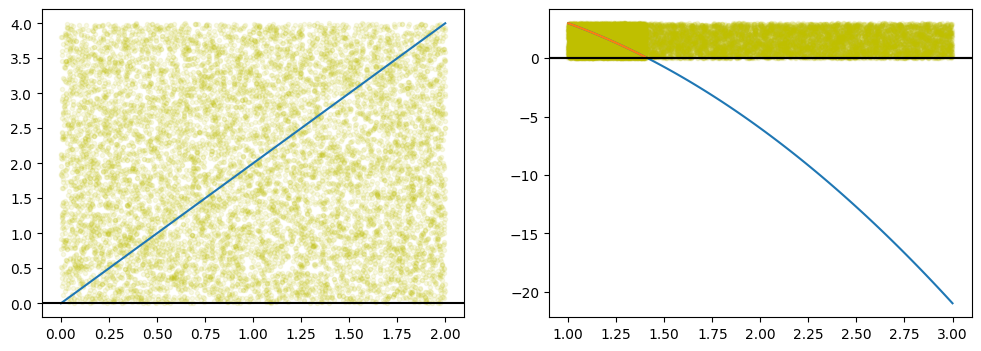

In [13]:
# původní podoba
i = 0                                                       # počitadlo grafů
fig, axs = plt.subplots(1, 2, figsize=(12, 4))              # 12" šířka, 4" výška
def zobraz(a, b, f, xs, fxs):
    x = np.linspace(a, b, 100)
    axs.flat[i].plot(x, f(x))
    axs.flat[i].axhline(y=0, color='k')
    axs.flat[i].scatter(xs, fxs, marker=".", color='y', alpha=0.1)

def integral(a, b, f, pocet_vzorku):
    max_f = max(f(np.linspace(a, b, 100000)))               # horní závora
    xs = np.random.uniform(a, b, pocet_vzorku)              # náhodné hodnoty x (mezi a a b)
    fxs = np.random.uniform(0, max_f, pocet_vzorku)         # náhodné funkční hodnoty (pro porovnání)
    hits = sum([1 for x, fx in zip(xs, fxs) if fx <= f(x)]) # spočítá hodnoty pod křivkou
    zobraz(a, b, f, xs, fxs)
    return (b-a)*max_f*hits/pocet_vzorku                    # obsah obdélníku

# int_0^2(2*x) = 0^2[x**2] = 4 - 0 = 4
print(integral(a=0, b=2, f=lambda x: 2*x, pocet_vzorku=10000))
i += 1

# int_1^3(-3x**2+6) = 1^3[-x**3+6x] = [-3**3 + 6*3] - [-1**3 + 6*1] =  [-27 + 18] - [-1 + 6] = -9 -5 = -14
print(integral(a=1, b=3, f=lambda x: -3*x**2 + 6, pocet_vzorku=10000))
print(integral(a=1, b=1.4, f=lambda x: -3*x**2 + 6, pocet_vzorku=10000))
# pod osou y se příspěvky neprojeví

plt.show()

4.0448
0.3389
0.6529999999346986
15.1488


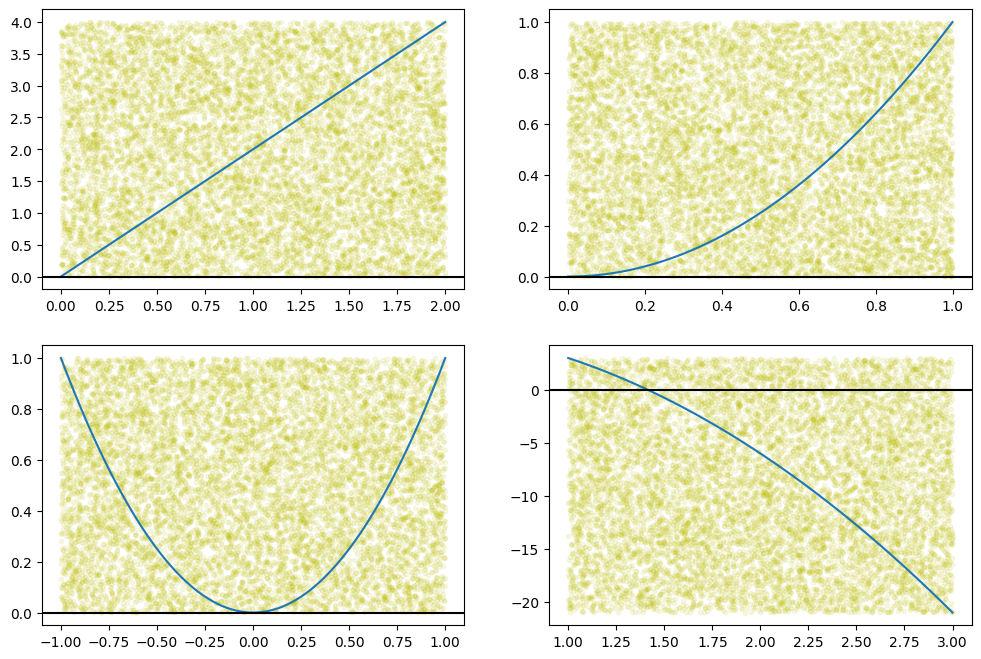

In [14]:
i = 0                                                       # počitadlo grafů
fig, axs = plt.subplots(2, 2, figsize=(12, 8))              # 12" šířka, 8" výška
def zobraz(a, b, f, xs, fxs):
    x = np.linspace(a, b, 100)
    axs.flat[i].plot(x, f(x))
    axs.flat[i].axhline(y=0, color='k')
    axs.flat[i].scatter(xs, fxs, marker=".", color='y', alpha=0.1)

def integral(a, b, f, pocet_vzorku):
    max_f = max(f(np.linspace(a, b, 100000)))               # horní závora
    min_f = min(f(np.linspace(a, b, 100000)))               # dolní závora
    xs = np.random.uniform(a, b, pocet_vzorku)              # náhodné hodnoty x (mezi a a b)
    fxs = np.random.uniform(min_f, max_f, pocet_vzorku)     # náhodné funkční hodnoty (pro porovnání)
    fx_in_domain = [fx for x, fx in zip(xs, fxs) if fx <= f(x) and fx>0 or fx >= f(x) and fx<0]
    hits = len(fx_in_domain)
    zobraz(a, b, f, xs, fxs)
    return (b-a)*(max_f-min_f)*hits/pocet_vzorku

#int_0^2(2*x) = 0^2[x**2] = 4 - 0 = 4
print(integral(a=0, b=2, f=lambda x: 2*x, pocet_vzorku=10000))
i += 1

#int_0^1(x**2) = 0^1[1/3 * x**3] = [1/3 1**3] - [1/3 * 0**3] = 1/3
print(integral(a=0, b=1, f=lambda x: x**2, pocet_vzorku=10000))
i += 1

#int_-1^1(x**2) = -1^1[1/3 * x**3] = [1/3 1**3] - [1/3 *(-1)**3] = 2/3
print(integral(a=-1, b=1, f=lambda x: x**2, pocet_vzorku=10000))
i += 1

#int_1^3(-3x**2+6) = 1^3[-x**3+6x] = [-3**3 + 6*3] - [-1**3 + 6*1] =  [-27 + 18] - [-1 + 6] = -9 -5 = -14
print(integral(a=1, b=3, f=lambda x: -3*x**2 + 6, pocet_vzorku=10000))

plt.show()

#### Cvičení 3: Integrál

Lepší řešení je náhodně vzorkovat prostor $(x,fx)$ a spočítat průměrnou navzorkovanou funkční hodnotu. Integrál se pak spočítá jako plocha oblasti od A do B na ose x a 0 do stredni hodnoty z navzorkovaných hodnot na ose y.
$$
\overline{I}_n \equiv \frac{1}{n} \sum_{i=1}^{n}I_i = \frac{b-a}{n} \sum_{i=1}^{n}g(a+(b-a)U_i)
$$
<!--img src="MS8_soubory/integral.png" alt="Drawing" style="width: 600px;"/-->

Vaším úkolem je naprogramovat výpočet integrálu touto metodou.

5.64808774468759


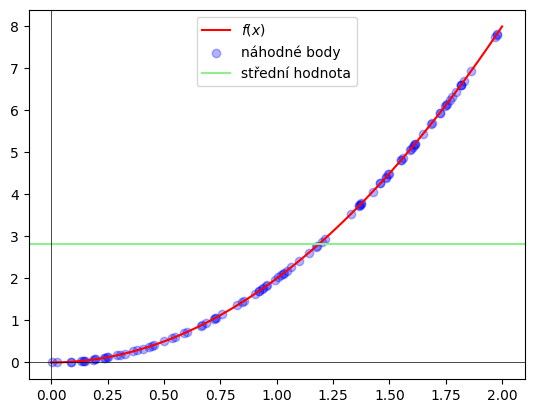

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def integral(a, b, f, n):
    xs = np.random.uniform(a, b, n)
    return (b-a)*np.mean(f(xs)), xs

f=lambda x: 2*x**2

integral_value, generated_xs = integral(a=0, b=2, f=f, n=100)
print(integral_value)

# Vytvoření grafu s vygenerovanými body
plt.plot(np.linspace(0, 2, 100), f(np.linspace(0, 2, 100)), color='red', label='$f(x)$')
plt.scatter(generated_xs, f(generated_xs), color='blue', alpha=0.3, label='náhodné body')
plt.axhline(integral_value/(2-0), color = "lightgreen", label="střední hodnota")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()

In [20]:
def integral(a, b, f, n):
    xs = np.random.uniform(a, b, n)
    return (b-a)*np.mean(f(xs))

#int_0^2(2*x) = 0^2[x**2] = 4 - 0 = 4
print(integral(a=0, b=2, f=lambda x: 2*x, n=10000))

#int_0^1(x**2) = 0^1[1/3 * x**3] = [1/3 1**3] - [1/3 * 0**3] = 1/3
print(integral(a=0, b=1, f=lambda x: x**2, n=10000))

#int_-1^1(x**2) = -1^1[1/3 * x**3] = [1/3 1**3] - [1/3 *(-1)**3] = 2/3
print(integral(a=-1, b=1, f=lambda x: x**2, n=10000))

#int_1^3(-3x**2+6) = 1^3[-x**3+6x] = [-3**3 + 6*3] - [-1**3 + 6*1] =  [-27 + 18] - [-1 + 6] = -9 -5 = -14
print(integral(a=1, b=3, f=lambda x: -3*x**2 + 6, n=10000))

4.00720589764762
0.3346285054764385
0.6685343062609723
-14.157649488481326


#### Statistické rozdělení

Monte Carlo lze využít i pro vytvoření libovolného statistického rozdělení pomocí rejection samplig metody.

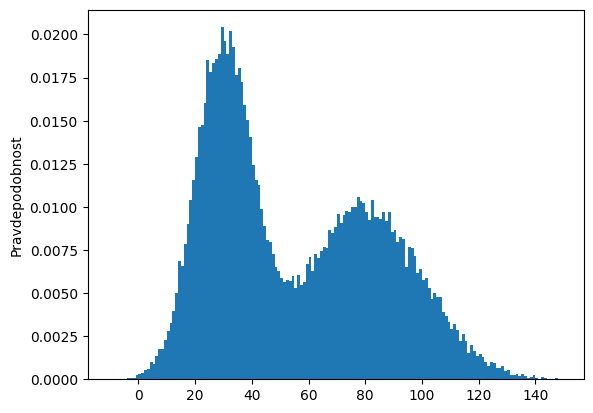

In [21]:
import numpy as np
from scipy.stats import norm

#P* = N(mu1, sigma1) + N(mu2, sigma2), součet normálních rozdělení
def P_star(x, mu_norm1, sigma_norm1, mu_norm2, sigma_norm2):
    p_x = norm.pdf(x, mu_norm1, sigma_norm1) + norm.pdf(x, mu_norm2, sigma_norm2)
    return(p_x)

#Q = proposal function, normální rozdělení z rozdílu středních hodnot a součtu rozptylů
def Q(x, mu_q, sigma_q):
    q_x = norm.pdf(x,mu_q,sigma_q)
    return(q_x)

#vygenerujeme souradnice x, u a zamitneme ty u, ktere nespadaji svou funkční hodnotou do P* rozdělení
def rejection_sampling(M, c, mu_q, sigma_q, mu_norm1, sigma_norm1, mu_norm2, sigma_norm2):
    x = np.random.normal(mu_q, sigma_q, size=M)
    u = np.random.uniform(0,c * Q(x, mu_q, sigma_q), size=M)
    return np.array(list(filter(
        lambda u: u[0] <= P_star(u[1], mu_norm1, sigma_norm1, mu_norm2, sigma_norm2), zip(u, x))))[:,1]

def main():

    #doména hodnot, na kterých chceme vzorkovat z rozdělení
    x = np.arange(-10,150)

    #střední hodnota a rozptyl dvou normálních rozdělení
    mu_norm1 = 30        #N(30, 10)
    sigma_norm1 = 10     
    mu_norm2 = 80       #N(80, 20)
    sigma_norm2 = 20

    #proposal function Q(x) = N(80-30, 20+10) = N(50, 30)
    #pomocí ní se provádí generování ze součtu rozdělení P* = N(30, 10) + N(80, 20)
    mu_q = 50
    sigma_q = 30

    #k rozdělení se vytváří normalizační konstanta
    c = max(P_star(x, mu_norm1, sigma_norm1, mu_norm2, sigma_norm2) / Q(x, mu_q, sigma_q))

    #pomocí rejection samplingu vrátíme přijaté hodnoty, spadající do rozdělení
    x_accepted = rejection_sampling(100000, c, mu_q, sigma_q, mu_norm1, sigma_norm1, mu_norm2, sigma_norm2)

    #vytvoříme histogram z nezamítnutých hodnot
    counts, bins, ignored = plt.hist(x_accepted, x, density = True)
    plt.ylabel("Pravdepodobnost")
    plt.show()

if __name__ == "__main__":
    main()

### 8.3 Aplikace metody Monte Carlo

Brownův pohyb (kvůli animaci je program vhodné spustit mimo Jupyter)

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Parametry simulace
num_particles = 100     # Počet částic
num_steps = 1000        # Počet kroků simulace
step_size = 0.1         # Velikost kroku částice
temperature = 300       # Teplota prostředí
drag_coefficient = 0.1  # Koeficient odporu prostředí

# Inicializace poloh a rychlostí částic
positions = np.zeros((num_particles, 2))
velocities = np.zeros((num_particles, 2))

# Simulace pohybu částic
for step in range(num_steps):
    # Náhodný pohyb částic
    random_displacement = 0.01*np.random.normal(scale=np.sqrt(2 * temperature * drag_coefficient), size=(num_particles, 2))
    positions += random_displacement
    
    # Vizualizace pohybu částic
    plt.clf()
    plt.scatter(positions[:, 0], positions[:, 1], c='b', alpha=0.5)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Brownian Motion Simulation')
    plt.pause(0.01)


Pohyb částic v trojrozměrném prostoru s interakcemi mezi nimi

....................................................................................................

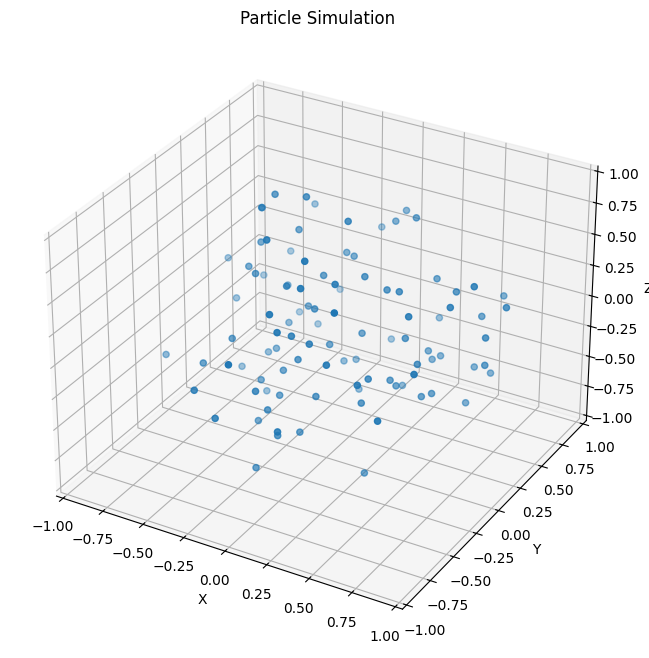

In [22]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

num_particles = 100         # Počet částic
num_steps = 100             # Počet kroků simulace
radius = 1.0                # Poloměr koule, ve které jsou částice pohybující se
max_force = 1.0             # Maximální síla interakce mezi částicemi

# Inicializace poloh a rychlostí částic
positions = np.zeros((num_particles, 3))        # pole pro polohy
velocities = np.zeros((num_particles, 3))       # pole pro rychlosti

# Simulace pohybu částic
for step in range(num_steps):
    print(".", end = "")
    # Aktualizace polohy částic
    for i in range(num_particles):
        # Náhodný pohyb do 3 směrů
        for j in range(3):
            positions[i, j] += random.uniform(-0.1, 0.1)
            
        # Ohraničení částic do koule
        distance = np.linalg.norm(positions[i])
        if distance > radius:
            positions[i] *= radius / distance
    
    # Aktualizace rychlostí částic
    for i in range(num_particles):
        force = np.zeros(3)
        for j in range(num_particles):
            if i != j:
                distance = positions[j] - positions[i]              # vektor
                distance_norm = np.linalg.norm(distance)
                force += distance / (distance_norm ** 3 + 0.01)     # jednotkový vektor / r**2
        force *= max_force
        velocities[i] += force

# Vizualizace výsledků
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-radius, radius)
ax.set_ylim(-radius, radius)
ax.set_zlim(-radius, radius)

ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Particle Simulation')

plt.show()


#### Optimalizace portfolia akcií

Rozhodujeme se rozložit uspořené finance do vybraných akcií, ale nevíme, kolik procent z uspořené částky do jaké akcie investovat. Na základě analýzy časového vývoje historických dat můžeme spočítat určité příznaky, které nám něco řeknou o volatilitě (rozptylu) ceny akcie a riziku, které z investice plyne. 

Metoda Monte Carlo se využívá tak, že vygenerujeme náhodné rozložení portfolia a následně zkoumáme, které z mnoha pokusů o rozložení dopadly nejlépe z pohledu očekávané návratnosti a míře očekávaného rizika. O tom vypovídá tzv. Sharpeho poměr.

In [ ]:
#!python -m pip install pandas_datareader       # do verze 3.11
!python -m pip install yfinance

In [8]:
#import pandas_datareader as pdr
import yfinance as yf

import datetime as dt
import pandas as pd
import numpy as np
 
# výběr akcií (Apple, Microsoft, IBM, Amazon) pro stažení
#akcie = ['AAPL', 'MSFT', 'TWTR', 'IBM']
akcie = ['AAPL', 'MSFT', 'IBM', 'AMZN']

# počáteční a koncové datum pro stažení dat o hodnotách akcií
start_datum = dt.datetime(2020, 1, 1)
end_datum = dt.datetime(2024, 1, 1)

# stáhnutí dat o akciích
# data = pdr.get_data_yahoo(akcie, start_datum)             # do verze 3.11
data = yf.download(akcie, start=start_datum, end=end_datum)

#Open   = prvotní cena, za kterou se akcie prodávala v daný časový interval
#Close  = poslední cena, za kterou se akcie prodávala v daný časový interval
#Low    = nejnižší cena, za kterou se akcie prodávala v daný časový interval
#High   = nejvyšší cena, za kterou se akcie prodávala v daný časový interval
#Volume = počet akcií, které byly směněny za daný časový interval
#Adj Close = upravená uzavírací cena pro přesnější výpočty návratnosti (po distribuci dividend na akcii atd.)
data.columns

[*********************100%%**********************]  4 of 4 completed


MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'AMZN'),
            ('Adj Close',  'IBM'),
            ('Adj Close', 'MSFT'),
            (    'Close', 'AAPL'),
            (    'Close', 'AMZN'),
            (    'Close',  'IBM'),
            (    'Close', 'MSFT'),
            (     'High', 'AAPL'),
            (     'High', 'AMZN'),
            (     'High',  'IBM'),
            (     'High', 'MSFT'),
            (      'Low', 'AAPL'),
            (      'Low', 'AMZN'),
            (      'Low',  'IBM'),
            (      'Low', 'MSFT'),
            (     'Open', 'AAPL'),
            (     'Open', 'AMZN'),
            (     'Open',  'IBM'),
            (     'Open', 'MSFT'),
            (   'Volume', 'AAPL'),
            (   'Volume', 'AMZN'),
            (   'Volume',  'IBM'),
            (   'Volume', 'MSFT')],
           names=['Price', 'Ticker'])

In [9]:
#nás zajímá upravená uzavírací cena (Adj Close)
data = data['Adj Close']
data

Ticker,AAPL,AMZN,IBM,MSFT
Date,,,,
2020-01-02,73.059425,94.900497,105.346352,154.493820
2020-01-03,72.349152,93.748497,104.506195,152.570114
2020-01-06,72.925629,95.143997,104.319504,152.964493
2020-01-07,72.582649,95.343002,104.389488,151.569794
2020-01-08,73.750244,94.598503,105.260773,153.984039
...,...,...,...,...
2023-12-22,193.353287,153.419998,160.675140,373.888580
2023-12-26,192.803986,153.410004,161.735489,373.968445
2023-12-27,192.903839,153.339996,161.983231,373.379547


In [10]:
# data.shift posune data směrem dolu v tabulce (bez argumentu o jeden řádek) 
# spočítáme podílem návratnost investice v logaritmické škále
log_navratnosti = np.log(data/data.shift())
log_navratnosti

Ticker,AAPL,AMZN,IBM,MSFT
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.009769,-0.012213,-0.008007,-0.012530
2020-01-06,0.007936,0.014776,-0.001788,0.002582
2020-01-07,-0.004714,0.002089,0.000671,-0.009160
2020-01-08,0.015958,-0.007839,0.008312,0.015803
...,...,...,...,...
2023-12-22,-0.005563,-0.002734,0.008423,0.002780
2023-12-26,-0.002845,-0.000065,0.006578,0.000214
2023-12-27,0.000518,-0.000456,0.001531,-0.001576


In [11]:
# Monte Carlo Simulation
N = 5000                                            # počet iterací (experimentů)

vahy_portfolia = np.zeros((N, len(akcie)))          # pole vah akcií v různých experimentech (rozložení financí k nákupu akcií)
ocekavana_navratnost = np.zeros(N)                  # očekávaná návratnost investice (nákup/prodej)
ocekavana_volatilita = np.zeros(N)                  # očekávané riziko investice (různé vzorce)
sharpeho_pomer = np.zeros(N)                        # poměr očekávané návratnosti k riziku
 
for i in range(N):
    weight = np.random.random(len(akcie))           # náhodně přidělíme akciím váhy, které budeme optimalizovat
    weight /= weight.sum()                          # normalizace, aby součet = 1 (suma plně alokována mezi akcie)
    vahy_portfolia[i] = weight
     
    # vážený průměr návratnosti jednotlivých akcií za určité časové období (zde 252 obchodních dní)
    ocekavana_navratnost[i] = np.sum(log_navratnosti.mean()*weight)*252
    # maticový součin kovariance logaritmických návratností portfolia a vah portfolia
    ocekavana_volatilita[i] = np.sqrt(252*weight.T @ log_navratnosti.cov() @ weight)
    sharpeho_pomer[i] = ocekavana_navratnost[i] / ocekavana_volatilita[i]

# optimální váhy portfolia pro experiment s nejvyšším Sharpeho poměrem (argmax vrátí jeho index)
optimalni_vahy = vahy_portfolia[sharpeho_pomer.argmax()]*100

# projde optimální váhy portfolia a vytiskne je spolu s názvy
for znacka_akcie, alokace in zip(akcie, optimalni_vahy):
    print(f"Akcie: {znacka_akcie:>4}, Jakou část prostředků investovat: {alokace:5.2f} %")

Akcie: AAPL, Jakou část prostředků investovat: 52.51 %
Akcie: MSFT, Jakou část prostředků investovat:  0.09 %
Akcie:  IBM, Jakou část prostředků investovat: 15.20 %
Akcie: AMZN, Jakou část prostředků investovat: 32.20 %


Zobrazíme vztah mezi očekávanou návratností a rizikem pro různé experimenty
- každý bod na grafu reprezentuje jeden experiment
- barva bodů je dána hodnotou Sharpeho poměru (návratnost/riziko)
- zvýrazněný bod odpovídá optimální kombinaci volatility a návratnosti (vypočtený pomocí argmax)

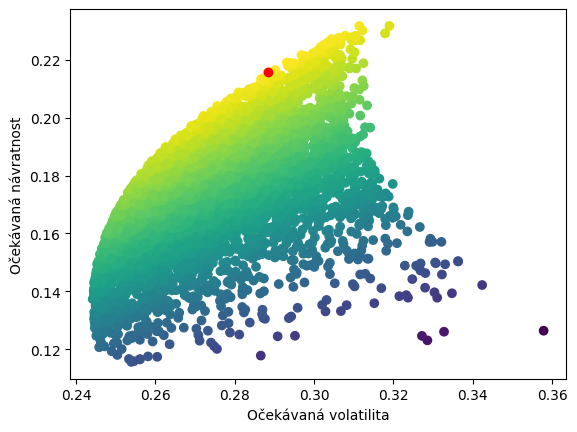

In [12]:
import matplotlib.pyplot as plt

plt.scatter(ocekavana_volatilita, ocekavana_navratnost, c=sharpeho_pomer)   # všechny experimenty 
volatilita_optima = ocekavana_volatilita[sharpeho_pomer.argmax()]
navratnost_optima = ocekavana_navratnost[sharpeho_pomer.argmax()]
plt.scatter(volatilita_optima, navratnost_optima, c='r')                    # optimální kombinace
plt.xlabel('Očekávaná volatilita')
plt.ylabel('Očekávaná návratnost')
plt.show()

#### Isingův model magnetismu

Isingův model představuje matematický model feromagnetismu ze statistické fyziky
- mřížka magnetických dipólů (spinů)
- spiny mohou nybývat dvou hodnot (up=1, down=-1)
- spiny mohou interagovat se svými sousedy
- pokud je natočení dvou párů spinů stejné, mají nižší energii než při opačném natočení

Systém se snaží dostat samovolně do stavu s minimální energií, ale tento přechod je narušován teplem, což umožňuje sledovat v modelu fázové přechody.

Sledujeme natočení spinů v daném čase
- obtížné řešit analyticky, proto numericky, např. MC
- zde Metropolisův-Hastingsův algoritmus (https://sites.physics.wustl.edu/gradcomputer/wiki/images/6/63/Ising_notes_v2.pdf)

- využití i v sociální fyzice pro modelování šíření volebního chování nebo segregace menšin

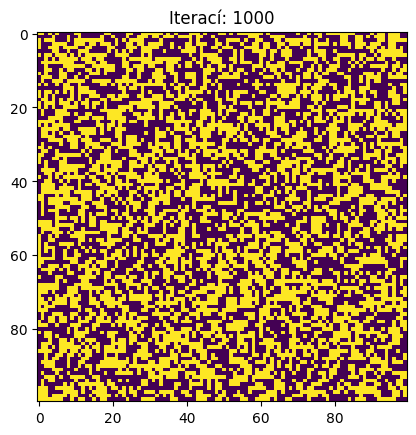

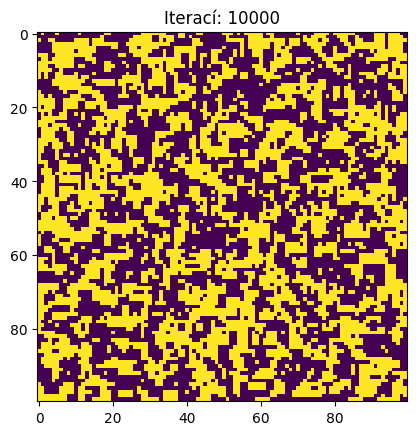

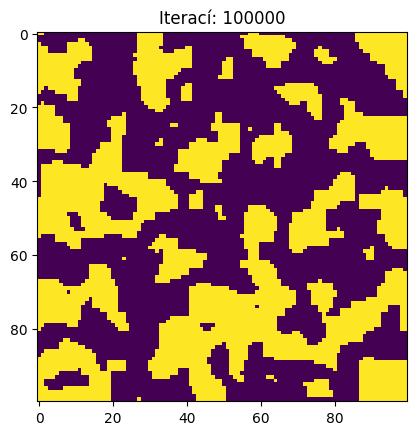

In [12]:
import numpy as np
from numpy.random import choice, randint, random
import matplotlib.pyplot as plt

def pocatecni_stav(vyska, sirka):       # generuje počáteční stav (v matici náhodně -1 nebo 1)
    return np.matrix([[choice([-1, 1]) for j in range(sirka)] for i in range(vyska)])

def zobraz_spiny(matice, i):               # zobrazí aktuální stav modelu
    plt.clf()
    plt.imshow(matice)
    plt.title(f"Iterací: {i}")
    plt.show()
   

def vyber_nahodny_spin(matice):         # vybere náhodný spin ze vstupní matice
    return (randint(0, matice.shape[0]), randint(0, matice.shape[1]))

def otoc_spin(matice, spin):            # otočí spin na zadané pozici v matici
    matice[spin[0], spin[1]] *= -1

def energie_interakce(matice, i, j):    #  spočítá energii interakce na pozici i,j v matici
    # energie interakce je součin hodnoty spinu na dané pozici a sumy spinů jejích okolních sousedů
    okolni_spiny = [matice[min(i+k, len(matice)-1), min(j+l, len(matice)-1)] 
                    for k in range(-1, 2) for l in range(-1, 2) 
                    if abs(k + l) == 1]
    return matice[i,j]*sum(okolni_spiny)

def hamiltonian(matice, J=1):           # celková energie systému = suma energie interakcí všech spinů
    return J*sum([energie_interakce(matice, i, j) for i in range(len(matice)) for j in range(len(matice))])

# Metropolisův algoritmus pro akceptaci nebo zamítnutí změn stavu spinů na základě změny energie a teploty
def metropolis(matice, beta, i, j):
    energie_pred_zmenou = energie_interakce(matice, i, j)
    otoc_spin(matice, (i, j))
    energie_po_zmene = energie_interakce(matice, i, j)
    zmena_energie = -(energie_po_zmene - energie_pred_zmenou)
    if zmena_energie > 0 and random() > np.exp(-beta*(zmena_energie)):
        otoc_spin(matice, (i, j))
    return zmena_energie

# Pro každou iteraci vybere náhodný spin, aplikuje na něj Metropolisův algoritmus a aktualizuje energii systému
def monte_carlo(matice, pocet_iteraci, teplota, energie, J=1):
    for iterace in range(pocet_iteraci):
        nahodny_spin = vyber_nahodny_spin(matice)
        energie.append(energie[-1] + metropolis(matice, beta=1.0/teplota, i=nahodny_spin[0], j=nahodny_spin[1]))
    return matice

def main():
    ising = pocatecni_stav(vyska=100, sirka=100)
    energie = [hamiltonian(ising)]
    #monte_carlo(matice=ising, pocet_iteraci=10, teplota=1, energie=energie)
    #monte_carlo(matice=ising, pocet_iteraci=10000, teplota=1, energie=energie)
    #monte_carlo(matice=ising, pocet_iteraci=100000, teplota=1, energie=energie)
    ising = monte_carlo(matice=ising, pocet_iteraci=1000, teplota=0.1, energie=energie)
    zobraz_spiny(ising, 1000)
    ising = monte_carlo(matice=ising, pocet_iteraci=9000, teplota=0.1, energie=energie)
    zobraz_spiny(ising, 10000)
    ising = monte_carlo(matice=ising, pocet_iteraci=90000, teplota=0.1, energie=energie)
    zobraz_spiny(ising, 100000)
    

if __name__ == "__main__":
    main()

#### Cvičení 4: Simulace ideálního plynu

Model ideálního plynu uvažuje mezičásticový potenciál, který se modeluje např. Lennard-Jonesovo vzorcem.

<!--img src="MS8_soubory/LJ.png" alt="Drawing" style="width: 600px;"/-->


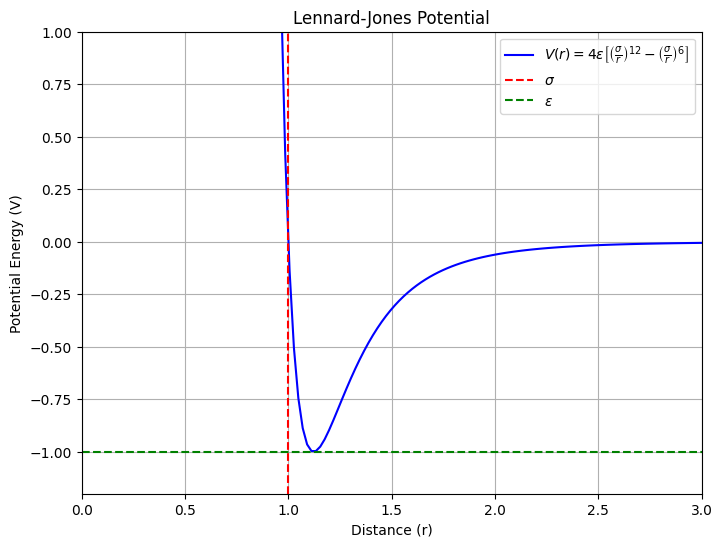

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Definice Lennard-Jonesova potenciálu
def lennard_jones_potential(r, sigma, epsilon):
    return 4 * epsilon * ((sigma / r) ** 12 - (sigma / r) ** 6)

sigma = 1.0
epsilon = 1.0

r = np.linspace(0.9, 3, 100)    # vytvoření rozsahu vzdáleností r

V = lennard_jones_potential(r, sigma, epsilon)

plt.figure(figsize=(8, 6))      # šířka: 8 palců, výška: 6 palců

plt.plot(r, V, label=r'$V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^6 \right]$', color='blue')
plt.axvline(x=sigma, color='r', linestyle='--', label=r'$\sigma$')
plt.axhline(y=-epsilon, color='g', linestyle='--', label=r'$\epsilon$')
plt.xlabel('Distance (r)')
plt.ylabel('Potential Energy (V)')
plt.title('Lennard-Jones Potential')
plt.legend()
plt.grid(True)
plt.xlim(0, 3)          # nastavení rozsahu os
plt.ylim(-1.2, 1)
plt.show()


Vaším úkolem je naprogramovat simulaci vývoje polohy ideálního plynu. Postup je následující:
1. Vygeneruj náhodně částice ve 2D simulačním čtverci
2. Pohni s náhodně vybranou částicí
3. Pokud se energie po posunu zmenšila, tak tam částici ponech
4. Pokud se zhoršila, tak losuj Metropolisovým algoritmem pravděpodobnost, která je podmíněna teplotou
5. Pokračuj do konce iteračního cyklu

Pro ověření funkčnosti můžete vykreslovat vývoj energie nebo uspořádejte molekuly na počátku nevýhodně a porovnejte s koncovým stavem.

Výstup může vypadat jako na následujícím obrázku, kde molekuly v nevýhodné původní poloze jsou vyznačeny modře a v koncové po vývoji oranžově.

<img src="data/s08_molekuly.png" alt="Drawing" style="width: 600px;"/>

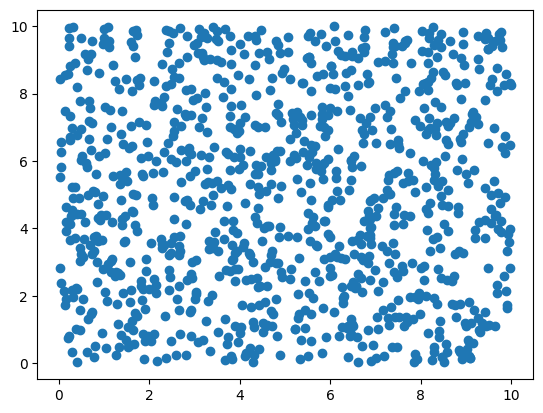

In [13]:
# vygenerování rovnoměrně rozmístěných částic (původní)
from numpy.random import uniform

def pocatecni_polohy(pocet_castic, simulacni_krabice):
    return np.array([uniform(simulacni_krabice[0], simulacni_krabice[1], size=2)
                    for i in range(pocet_castic)])

def vykresli_castice(polohy):
    plt.scatter(polohy[:,0], polohy[:,1])

def main():
    polohy = pocatecni_polohy(pocet_castic=1000, simulacni_krabice=(0, 10))
    vykresli_castice(polohy)

if __name__ == "__main__":
    main()

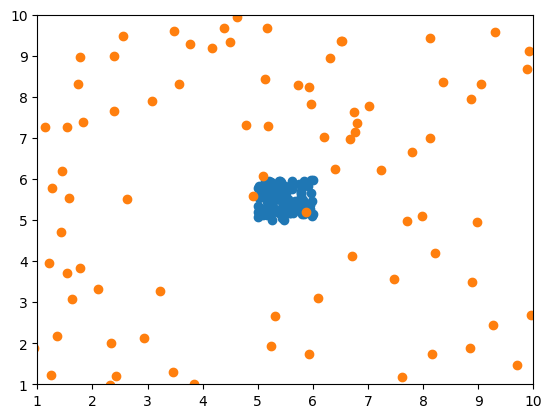

In [7]:
import numpy as np
import random
from numpy.random import uniform, choice, randint, rand
from math import sqrt
import matplotlib.pyplot as plt


# generuje počáteční polohy částic v simulační krabici
def pocatecni_polohy(pocet_castic, simulacni_krabice):
    stred = (simulacni_krabice[1]-simulacni_krabice[0])/2       # (konec - začátek)/2
    rozmer = 1                                                  # oblast počátečního výskytu
    return np.array([[stred + rozmer*rand() for _ in range(2)]      
                     for i in range(pocet_castic)])

# vykresluje polohy částic a ukládá výsledek do souboru 
def vykresli_castice(polohy, nazev_souboru):
    plt.scatter(polohy[:,0], polohy[:,1])
    plt.xlim(1, 10)                         # meze pro osu x
    plt.ylim(1, 10)                         # meze pro osu y
    plt.savefig(nazev_souboru)              # uložení souboru
    #plt.show()                              # zobrazení do samostatných grafů

# potenciální energie mezi 2 molekulami na základě jejich vzdálenosti 
def lennard_jones_potencial(vzdalenost, epsilon, sigma):
    return 4*epsilon*((sigma/vzdalenost)**12 - (sigma/vzdalenost)**6)

# vzdálenost mezi 2 molekulami na základě jejich poloh
def vzdalenost_molekul(poloha_A, poloha_B):
    return sqrt((poloha_A[0]-poloha_B[0])**2 + (poloha_A[1]-poloha_B[1])**2)

# náhodně vybírá molekulu ze seznamu molekul
def vylosuj_nahodnou_molekulu(molekuly):
    return randint(0, len(molekuly))

# generuje novou náhodnou polohu uvnitř simulační krabice
def vygeneruj_novou_polohu(simulacni_krabice):
    return np.array([uniform(simulacni_krabice[0], simulacni_krabice[1], size=2)])

# počítá celkovou energii systému pomocí potenciálu LJ
def hamiltonian(molekuly, epsilon, sigma):
    H = 0
    for i_molekula in range(len(molekuly)):
        for j_molekula in range(i_molekula+1, len(molekuly)):
            molekula_A = (molekuly[i_molekula,0], molekuly[i_molekula,1])
            molekula_B = (molekuly[j_molekula,0], molekuly[j_molekula,1])
            vzdalenost = vzdalenost_molekul(molekula_A, molekula_B)
            H += lennard_jones_potencial(vzdalenost, epsilon, sigma)
    return H

# spočte potenciální energii jedné molekuly vzhledem k ostatním molekulám
def potencialni_energie_molekuly(i_molekula, molekuly, epsilon, sigma):
    potencialni_energie = 0
    for j_molekula in range(0, len(molekuly)):
        if i_molekula == j_molekula:
            continue
        molekula_A = (molekuly[i_molekula,0], molekuly[i_molekula,1])
        molekula_B = (molekuly[j_molekula,0], molekuly[j_molekula,1])
        vzdalenost = vzdalenost_molekul(molekula_A, molekula_B)
        potencialni_energie += lennard_jones_potencial(vzdalenost, epsilon, sigma)
    return potencialni_energie

# Metropolisův algoritmus pro výběr nových poloh molekul a akceptaci nebo zamítnutí změn 
# na základě změny energie a teploty
def metropolis(molekuly, simulacni_krabice, beta, epsilon, sigma):
    vybrana_molekula = vylosuj_nahodnou_molekulu(molekuly)
    puvodni_poloha = molekuly[vybrana_molekula]
    energie_pred_zmenou = potencialni_energie_molekuly(vybrana_molekula, molekuly, epsilon, sigma)
    molekuly[vybrana_molekula] = vygeneruj_novou_polohu(simulacni_krabice)
    energie_po_zmene = potencialni_energie_molekuly(vybrana_molekula, molekuly, epsilon, sigma)
    zmena_energie = -(energie_po_zmene - energie_pred_zmenou)
    if zmena_energie > 0 and random.random() > np.exp(-beta*(zmena_energie)):
        molekuly[vybrana_molekula] = puvodni_poloha
    return zmena_energie

# simulace po zadaný počet iterací
def monte_carlo(pocet_iteraci, energie, teplota, molekuly, simulacni_krabice, epsilon, sigma):
    for iterace in range(pocet_iteraci):
        zmena_energie = metropolis(molekuly, simulacni_krabice, beta=1.0/teplota, epsilon=epsilon, sigma=sigma)
        energie.append(energie[-1] + zmena_energie)

# inicializuje parametry simulace, generuje počáteční polohy molekul, provádí simulaci MC
# a vykresluje výsledné polohy molekul na začátku a na konci simulace
def main():
    epsilon, sigma, teplota = 1, 1, 1
    simulacni_krabice = (0, 10)
    pocet_castic = 100
    molekuly = pocatecni_polohy(pocet_castic, simulacni_krabice)
    vykresli_castice(molekuly, "molekuly_init.png")
    energie = [hamiltonian(molekuly, sigma, epsilon)]
    energie = monte_carlo(1000, energie, teplota, molekuly, simulacni_krabice, epsilon, sigma)
    vykresli_castice(molekuly, "molekuly_end.png")

if __name__ == "__main__":
    main()

#### Simulace šíření nemoci
Pro každého jedince v populaci se náhodně vybere jiný jedinec a pokud je tento druhý jedinec infikovaný, má první jedinec pravděpodobnost *"nakazlivost"* se nakazit

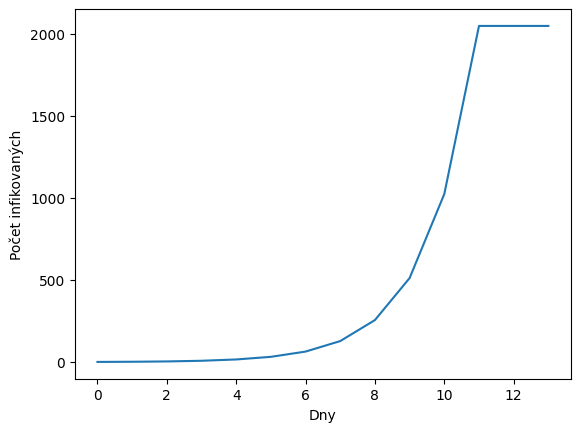

In [14]:
import random
import matplotlib.pyplot as plt

populace = 2000                 # počet lidí v populaci
pocatecni_inf = 1               # počet lidí, kteří jsou na začátku infikovaní
nakazlivost = 0.01              # pravděpodobnost přenosu nákazy mezi jednotlivci
dni = 14                        # počet dní simulace

# počet infikovaných jednotlivců po dnech
pocty_inf = [pocatecni_inf]

for den in range(1, dni):       # simulace šíření nákazy pomocí MC
    novi_inf = 0                # počet nově infikováných v tomto dni
    for jedinec in range(populace):
        # pokud je infikovaný, může nakazit další
        if jedinec < pocty_inf[-1]:
            for i in range(populace):
                # pokud jedinec zdravý a náhodně vybraný infikovaný, infikuje se s pravděpodobností nakazlivost
                if i >= pocty_inf[-1] and random.random() < nakazlivost:
                    novi_inf += 1
                    break
    # počet infikovaných jedinců v tomto dni
    pocty_inf.append(pocty_inf[-1] + novi_inf)

# vizualizace výsledků
plt.plot(pocty_inf)
plt.xlabel('Dny')
plt.ylabel('Počet infikovaných')
plt.show()
